**Reference**: <https://daviddalpiaz.github.io/appliedstats/logistic-regression.html>

In [2]:
library(tidyverse)

# 1. Generalized Linear Model 

Read the book, very informative

# 2. Binary Response

**Reference**:
- Logit function and Sigmoid function: <https://nathanbrixius.wordpress.com/2016/06/04/functions-i-have-known-logit-and-sigmoid/#:~:text=The%20inverse%20of%20the%20logit,range%20%5B0%2C%201%5D.&text=The%20sigmoid%20might%20be%20useful,something%20that%20represents%20a%20probability.>

**logit** function: the log of odds: $$logit(p) = log\left(\frac{p}{1 - p}\right)$$

why **logit** function: It maps probability (from 0 to 1) to real number (from -Infinity to Infinity)

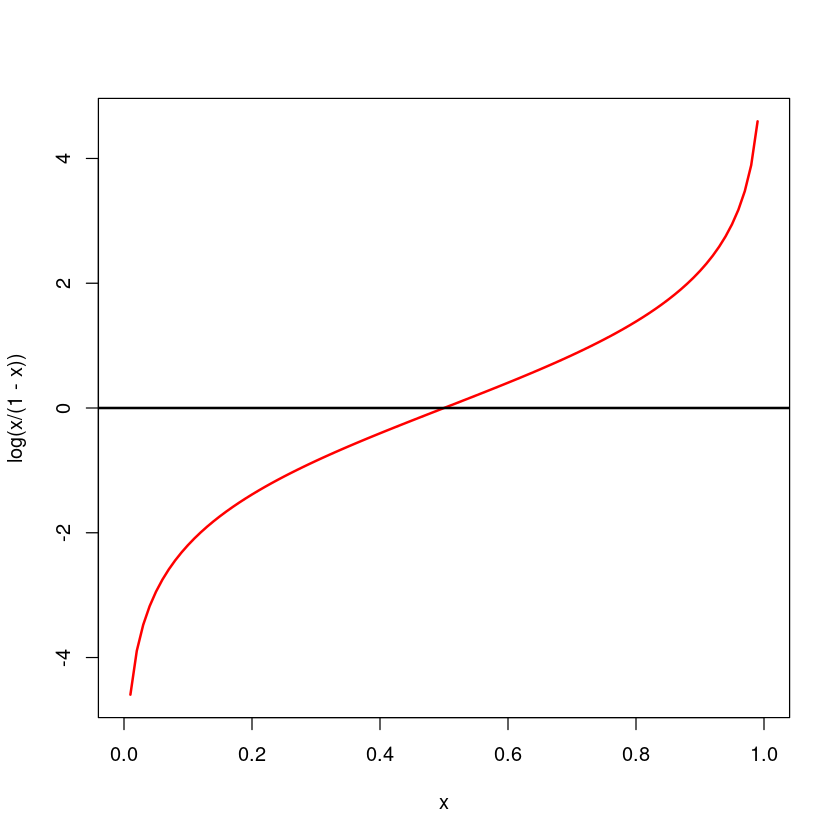

In [6]:
curve(log(x / (1 - x)), lwd = 2, col = "red")
abline(h = 0, lwd = 2)

---
**sigmoid** function: is the inverse function of **logit** function (i.e: sigmoid(logit(p)) = p), it maps real number (from -Infinity to Infinity) to probability (from 0 to 1)

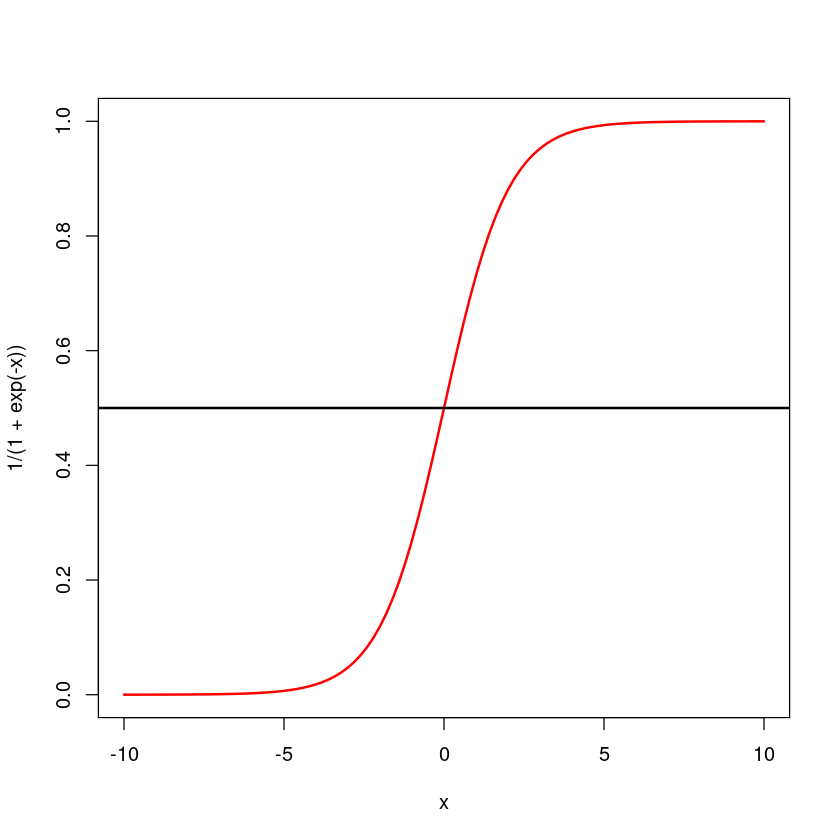

In [14]:
curve(1 / (1 + exp(-x)), xlim = c(-10, 10), lwd = 2, col = "red")
abline(h = 0.5, lwd = 2)

## 2.1 Fitting Logistic Regression

Using Maximum Likelihood Estimation, read the book for the math, note that there is no analytical solution for this maximization problem

## 2.2 Fitting Issues

When the data is linear separatable (There a multiple hyper-plane that can perfectly separate the data, think about support vector machine), in this case, the estimated coefficients are highly suspected (we cannot make inference), but for prediction, it is still ok, does not hurt.

# 3. Simulation for Logistic Regresson

## 3.1 Simulation process

For a given observation $X = x_i$, the response $Y_i$ will come from a bernoulli distribution with $\lambda$ = sigmoid($\beta^T x_i$)

$$Y_i|X = x_i \sim Bernoulli(\lambda = sigmoid(\beta^T x_i))$$

In this simulation, we will use the model having $\beta_0 = -2$ and $\beta_1 = 3$ ($x_i$ is just a scalar, not a vector in this simulation)
$$ -2 + 3 x_i = logit(E[Y_i|X = x_i])$$

or equivalent:
$$ Y_i|X = x_i \sim Bernoulli\left(\lambda = \frac{1}{1 + e^{-2 + 3x_i}}\right)$$

In [4]:
sim_logistic_data <- function(sample_size = 25, beta0 = -2, beta1 = 3) {
    x <- rnorm(sample_size)
    lambda <- 1 / (1 + exp(-(beta0 + beta1 * x)))
    y <- rbinom(sample_size, size = 1, p = lambda)
    tibble(x, y)
}

In [17]:
set.seed(1)
sim_data <- sim_logistic_data()
head(sim_data)

x,y
<dbl>,<int>
-0.6264538,0
0.1836433,1
-0.8356286,0
1.5952808,1
0.3295078,0
-0.8204684,0


In [18]:
# ordinary linear regression
linear_mod <- lm(y ~ x, data = sim_data) # equivalent: glm(y ~ x, data = sim_data, family = gaussian)
# logistic regression
logistic_mod <- glm(y ~ x, data = sim_data, family = binomial)


## 3.2 Making prediction for GLM

>Making prediction: 
>- `predict(type = "link")` will returns the net value ($\beta^T x_i$)
>- `predict(type = "response")` will returns the activation ($sigmoid(\beta^T x_i$))

In [19]:
# net value
predict(logistic_mod, sim_data, type = "link")

1            2            3            4            5            6 
 -4.60232636  -1.64017779  -5.36718136   3.52152413  -1.10681933  -5.31174745 
           7            8            9           10           11           12 
 -0.52937463   0.38803412  -0.20631135  -3.42833939   3.21620479  -0.88620059 
          13           14           15           16           17           18 
 -4.58326400 -10.40980381   1.80167329  -2.47597736  -2.37087631   1.13949414 
          19           20           21           22           23           24 
  0.69114804  -0.14005505   1.04859693   0.54823275  -2.03902657  -9.58581025 
          25 
 -0.04526147

In [20]:
# activation
predict(logistic_mod, sim_data, type = "response")

1            2            3            4            5            6 
9.928907e-03 1.624409e-01 4.645586e-03 9.712940e-01 2.484643e-01 4.909081e-03 
           7            8            9           10           11           12 
3.706628e-01 5.958094e-01 4.486043e-01 3.142143e-02 9.614396e-01 2.918945e-01 
          13           14           15           16           17           18 
1.011806e-02 3.013468e-05 8.583525e-01 7.755951e-02 8.542065e-02 7.575868e-01 
          19           20           21           22           23           24 
6.662223e-01 4.650434e-01 7.405054e-01 6.337255e-01 1.151659e-01 6.869192e-05 
          25 
4.886866e-01

## 3.3 Visualization

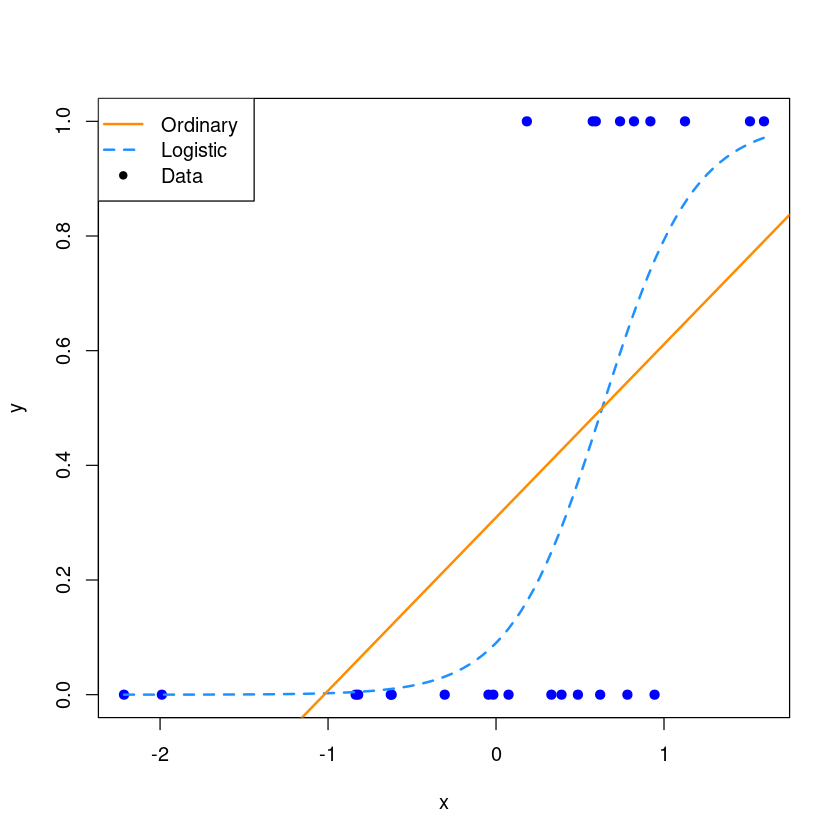

In [24]:
plot(y ~ x, data = sim_data, pch = 20, cex = 1.5, col = "blue")
curve(predict(logistic_mod, tibble(x), type = "response"), col = "dodgerblue", lty = 2, lwd = 2, add = T)
abline(coef(linear_mod), lwd = 2, col = "darkorange")
legend("topleft", c("Ordinary", "Logistic", "Data"), lty = c(1, 2, 0), 
       pch = c(NA, NA, 20), lwd = 2, col = c("darkorange", "dodgerblue", "black"))

## 3.4 Interpretation

Let's look at coefficients 

In [29]:
# estimated coefficients (beta_hat_0 and beta_hat_1)
coef(logistic_mod)

(Intercept)           x 
  -2.311676    3.656535

In [32]:
# true coefficients
c(`(Intercept)`= -2, x = 3)

(Intercept)           x 
         -2           3

Estimated model:
$$ -2.3 + 3.7 x = logit(\hat{E}[Y|X=x]) = log(\hat{p}(x))$$

- If we increase x by 1 unit, then the <u>**logit** (log odd)</u> of mean response $E[Y|X=x]$ (the log odd of the probability of $x$ being classified as 1) will increase by 3.7
- $\hat{\beta}_1$ is positive, so if we increase $x$, log odd of $\hat{p}(x)$ will increase, which means that we also increase $\hat{p}(x)$

## 3.5 Another examples

let's consider $\beta_0 = 1$ and $\beta_1 = -4$. In this case, increase $x$ will decrease the log odds

In [33]:
sim_data <- sim_logistic_data(sample_size = 50, beta0 = 1, beta1 = -4)

logistic_mod <- glm(y ~ x, sim_data, family = binomial)

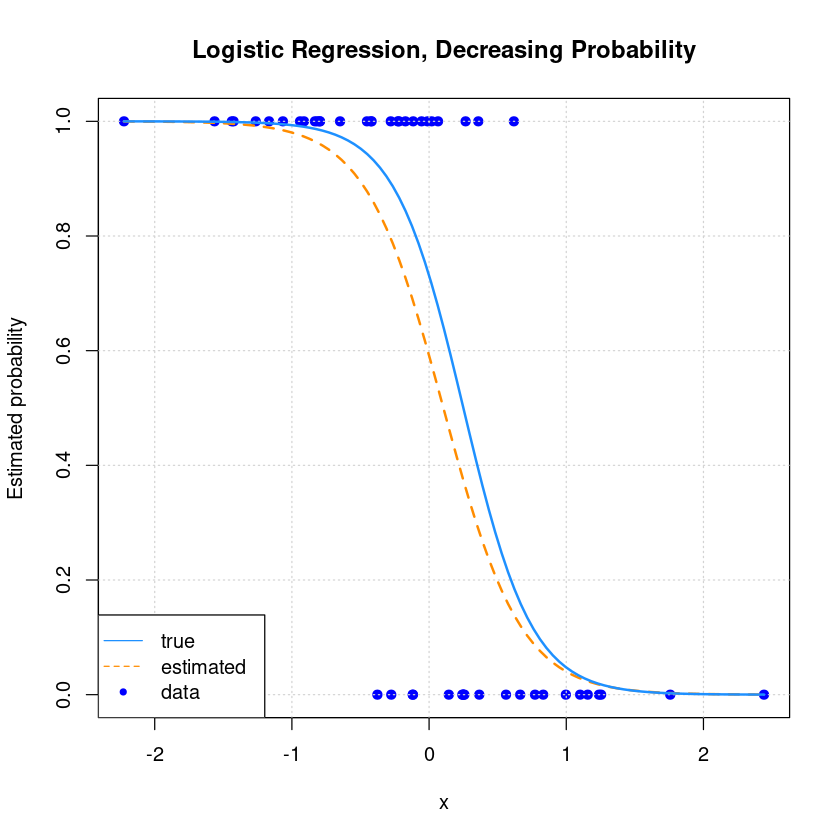

In [45]:
plot(y ~ x, data = sim_data, pch = 20, cex = 1.5, col = "blue",
    ylab = "Estimated probability",
    main = "Logistic Regression, Decreasing Probability")
grid()
curve(predict(logistic_mod, tibble(x), type = "response"), add = T, lty = 2, lwd = 2, col = "darkorange")
curve(boot::inv.logit(1 - 4 * x), add = T, lwd = 2, col = "dodgerblue")
legend("bottomleft", c("true", "estimated", "data"), lty = c(1, 2, NA), pch = c(NA, NA, 20), col = c("dodgerblue", "darkorange", "blue"))

We can clearly see that as $x$ increases, $\hat{p}(x)$ decreases

---
Now let’s look at an example where the estimated probability doesn’t always simply increase or decrease. Much like ordinary linear regression, the linear combination of predictors can contain transformations of predictors (in this case a quadratic term) and interactions.

In [46]:
sim_quadratic_logistic_data <- function(sample_size = 25) {
    x <- rnorm(sample_size)
    z <- -1.5 + 0.5 * x + x ^ 2
    p <- 1 / (1 + exp(-z))
    y <- rbinom(sample_size, size = 1, prob = p)
    tibble(x, y)
}

In [65]:
# simulate data
set.seed(42)
sim_data <- sim_quadratic_logistic_data(sample_size = 50)

In [66]:
# fit model
logistic_mod <- glm(y ~ x + I(x^2), data = sim_data, family = binomial)

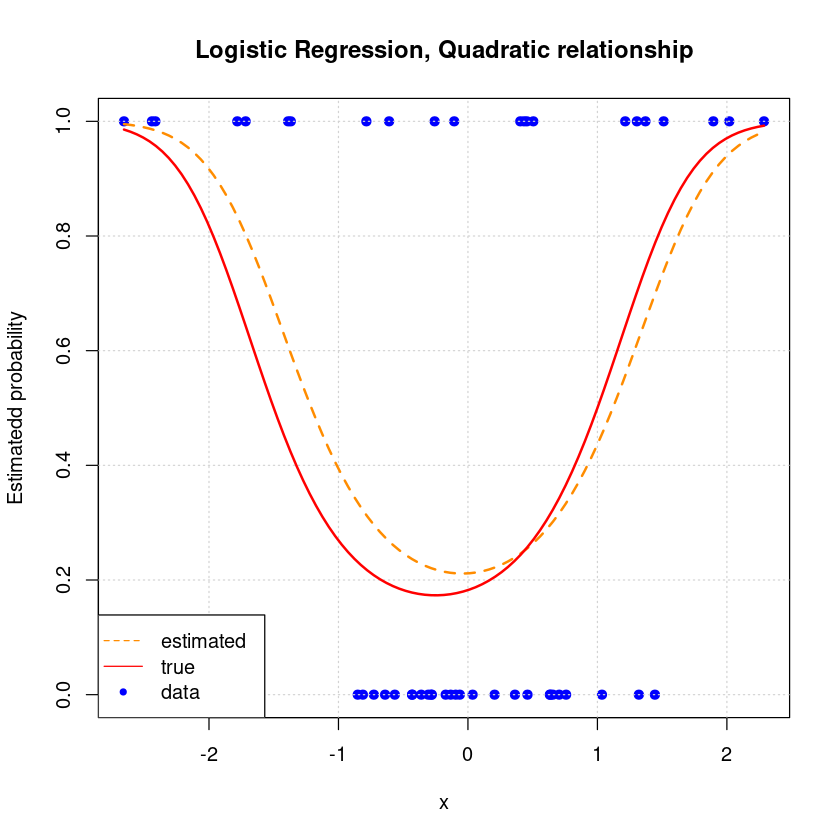

In [67]:
plot(y ~ x, data = sim_data, pch = 20, cex = 1.5, col = "blue",
    main = "Logistic Regression, Quadratic relationship",
    ylab = "Estimatedd probability")
grid()
curve(predict(logistic_mod, tibble(x), type = "response"), lty = 2, lwd = 2, add = T, col = "darkorange")
curve(boot::inv.logit(-1.5 + 0.5 * x + x ^ 2), add = T, lwd = 2,  col = "red")
legend("bottomleft", c("estimated", "true", "data"), lty = c(2, 1, NA), col = c("darkorange", "red", "blue"), pch = c(NA, NA, 20))

# 4. Working with Logistic Regression

Many of the things we did with ordinary linear regression can be done with logistic regression in a very similar fashion. For example,

- Testing for a single   β parameter: Wald Test
- Testing for a set of   β parameters: Likelihood-Ratio test
- Formula specification in R
- Interpreting parameters and estimates
- Confidence intervals for parameters
- Confidence intervals for mean response
- Variable selection


## 4.1 Wald Test

$H_0: \beta_j = 0$  
$H_1: \beta_j \ne 0$

Read the book for the math

$$z = \frac{\hat{\beta}_j - \beta_j}{\text{SE}[\hat{\beta}_j]} \overset{\text{approx}}{\sim} N(0, 1)$$

The test statistic and its distribution are no longer   t.but now we are performing a   z -test, as the test statistic is approximated by a standard normal distribution, provided we have a large enough sample. (The   t
 -test for ordinary linear regression, assuming the assumptions were correct, had an exact distribution for any sample size.)

## 4.2 Likelihood-Ratio Test

$H_0$: coefficients in the full model that are not in the null model are all equal to 0  
$H_1$: At least 1 coefficients in the full model that are not in the null model are not 0

What is Likelihood-Ratio?

$$D = -2 \log \left( \frac{L(\boldsymbol{\hat{\beta}_{\text{Null}}})} {L(\boldsymbol{\hat{\beta}_{\text{Full}}})} \right) = 2 \log \left( \frac{L(\boldsymbol{\hat{\beta}_{\text{Full}}})} {L(\boldsymbol{\hat{\beta}_{\text{Null}}})} \right) = 2 \left( \ell(\hat{\beta}_{\text{Full}}) - \ell(\hat{\beta}_{\text{Null}})\right)$$

where   $L$ denotes a likelihood and   $l$ denotes a log-likelihood. For a large enough sample, this test statistic has an approximate Chi-square distribution

$$D \overset{\text{approx}}{\sim} \chi^2_{k}$$

where   k = p − q , the difference in number of parameters of the two models.  This test, which we will call the Likelihood-Ratio Test, will be the analogue to the ANOVA   F -test for logistic regression. 

## 4.3 `SAheart` example

In [2]:
library(bestglm)

Loading required package: leaps



In [4]:
# Read the book for the information about this dataset
head(SAheart)

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
,<int>,<dbl>,<dbl>,<dbl>,<fct>,<int>,<dbl>,<dbl>,<int>,<int>
1,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
2,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
3,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
4,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
5,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1
6,132,6.20,6.47,36.21,Present,62,30.77,14.14,45,0


We’ll begin by attempting to model the probability of coronary heart disease `chd` based on low density lipoprotein cholesterol `ldl`

### 4.3.1 Fitting Logistic model

In [5]:
chd_mod_ldl <- glm(chd ~ ldl, data = SAheart, family = binomial)

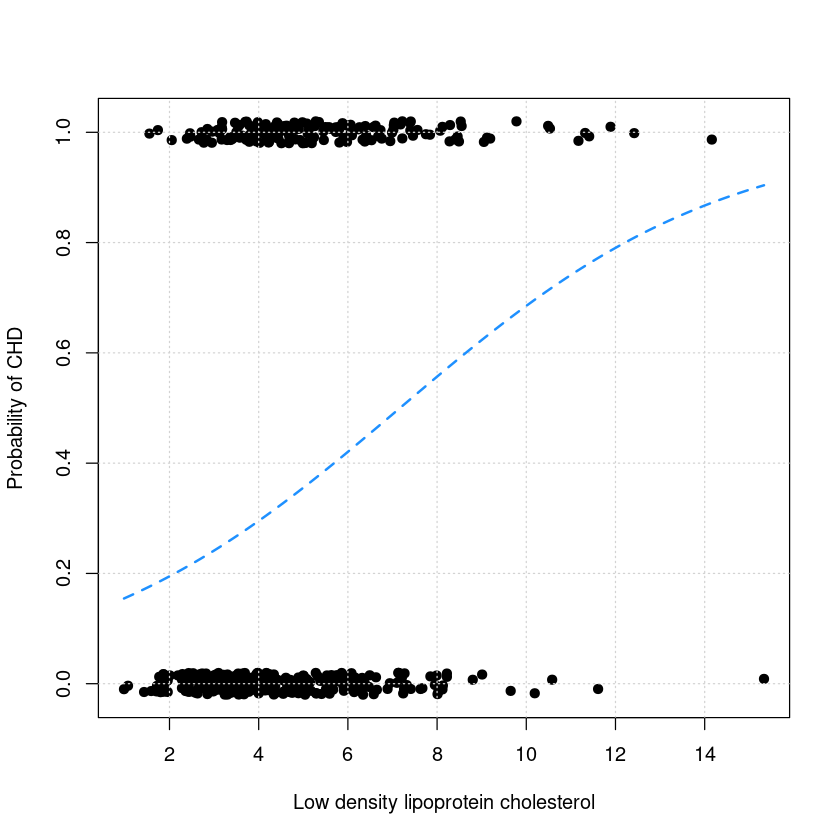

In [13]:
plot(jitter(chd, factor = 0.1) ~ ldl, data = SAheart, pch = 20, cex = 1.5, 
    xlab = "Low density lipoprotein cholesterol",
    ylab = "Probability of CHD")
grid()
curve(predict(chd_mod_ldl, tibble(ldl = x), type = "response"), lty = 2, lwd = 2, col = "dodgerblue", add = T)

### 4.3.2 Inference for a single parameter $\beta$

In [15]:
summary(chd_mod_ldl)$coefficients

,Estimate,Std. Error,z value,Pr(>|z|)
(Intercept),-1.9686681,0.27307908,-7.209150,5.630207e-13
ldl,0.2746613,0.05163983,5.318787,1.044615e-07


p value of `ldl` is smaller than 0.01 so we reject $H_0: \beta_{ldl} = 0$ and concludes that `ldl` variable appears to be significant

### 4.3.3 Inference for multiple $\beta$ paramters

In [16]:
# additive model 
chd_mod_add <- glm(chd ~ ., data = SAheart, family = binomial)

We can use the Likelihood-Ratio Test to compare the 2 models

$$H_0: \beta_{\texttt{sbp}} = \beta_{\texttt{tobacco}} = \beta_{\texttt{adiposity}} = \beta_{\texttt{famhist}} = \beta_{\texttt{typea}} = \beta_{\texttt{obesity}} = \beta_{\texttt{alcohol}} = \beta_{\texttt{age}} = 0$$

> **`anova(null_model, full_model, test = "LRT")`**

In [18]:
anova(chd_mod_ldl, chd_mod_add, test = "LRT")

,Resid. Df,Resid. Dev,Df,Deviance,Pr(>Chi)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,460,564.2788,NA,NA,NA
2,452,472.1400,8,92.13879,1.709923e-16


We can also manually calculate the Likelihood Ratio:

> **`logLik(model)`** to calculate the log likelihood of a fitted model

In [20]:
2 * (logLik(chd_mod_add) - logLik(chd_mod_ldl))

'log Lik.' 92.13879 (df=10)

p value is smaller than 0.01, so we reject $H_0$, concludes that the additive model is significant. We prefer the larger model

### 4.4.4 Feature Selection

In [21]:
# turn off verbose
chd_mod_backward_aic <- step(chd_mod_add, direction = "backward", trace = 0)
coef(chd_mod_backward_aic)

(Intercept)        tobacco            ldl famhistPresent          typea 
   -6.44644451     0.08037533     0.16199164     0.90817526     0.03711521 
           age 
    0.05046038

We could again compare this model to the additive model:
$$H_0: \beta_{\texttt{sbp}} = \beta_{\texttt{adiposity}} = \beta_{\texttt{obesity}} = \beta_{\texttt{alcohol}} = 0$$

In [22]:
anova(chd_mod_backward_aic, chd_mod_add, test = "LRT")

,Resid. Df,Resid. Dev,Df,Deviance,Pr(>Chi)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,456,475.6856,NA,NA,NA
2,452,472.1400,4,3.545546,0.4709869


p value > 0.05, so we fail to reject $H_0$, concludes that the additive model is not significant compare to the selected model. So we prefect the selected model.

## 4.5 Confidence interval for $\beta$

In [24]:
confint(chd_mod_backward_aic, level = .99)

Waiting for profiling to be done...



,0.5 %,99.5 %
(Intercept),-8.941825274,-4.18278990
tobacco,0.015704975,0.14986616
ldl,0.022923610,0.30784590
famhistPresent,0.330033483,1.49603366
typea,0.006408724,0.06932612
age,0.024847330,0.07764277


## 4.6 Confidence Interval for Mean Response

$$\frac{\hat{\eta}({\bf x}) - \eta({\bf x})}{\text{SE}[\hat{\eta}({\bf x})]} \overset{\text{approx}}{\sim} N(0, 1)$$

In [31]:
new_obs = data.frame(
  sbp = 148.0,
  tobacco = 5,
  ldl = 12,
  adiposity = 31.23,
  famhist = "Present",
  typea = 47,
  obesity = 28.50,
  alcohol = 23.89,
  age = 60
)

eta_hat <- predict(chd_mod_backward_aic, new_obs, se.fit = T, type = "link")
eta_hat

$fit
       1 
1.579545 

$se.fit
[1] 0.4114796

$residual.scale
[1] 1

95% confidence interval for the net value: $\eta(x) = \beta_0 + \beta_1 x_1 + ... + \beta_{p - 1} x_{p-1}$

In [34]:
z_crit <- qnorm(1 - (1 - .95) / 2)
net_value_confint <- eta_hat$fit + c(-z_crit, z_crit) * eta_hat$se.fit

net_value_confint

[1] 0.7730599 2.3860302

95% confidence interval for the activation (mean response) $p(x)$: p(x) = sigmoid($\eta(x)$)

In [36]:
# the sigmoid function is the inverse of logit function
mean_response_confint <- boot::inv.logit(net_value_confint)
mean_response_confint

[1] 0.6841824 0.9157558

Notice, as we would expect, the bounds of this interval are both between 0 and 1. Also, since both bounds of the interval for   $\eta(x)$  are positive, both bounds of the interval for   $p(x)$ are greater than 0.5.

## 4.7 Formula Syntax

The same, just like Linear regression

### 4.7.1 Interaction

Let’s add an interaction between LDL and family history for the model we selected

In [37]:
chd_mod_interaction = glm(chd ~ alcohol + ldl + famhist + typea + age + ldl:famhist, 
                          data = SAheart, family = binomial)
summary(chd_mod_interaction)


Call:
glm(formula = chd ~ alcohol + ldl + famhist + typea + age + ldl:famhist, 
    family = binomial, data = SAheart)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.9082  -0.8308  -0.4550   0.9286   2.5152  

Coefficients:
                    Estimate Std. Error z value Pr(>|z|)    
(Intercept)        -6.043472   0.937186  -6.449 1.13e-10 ***
alcohol             0.003800   0.004332   0.877  0.38033    
ldl                 0.035593   0.071448   0.498  0.61837    
famhistPresent     -0.733836   0.618131  -1.187  0.23515    
typea               0.036253   0.012172   2.978  0.00290 ** 
age                 0.062416   0.009723   6.419 1.37e-10 ***
ldl:famhistPresent  0.314311   0.114922   2.735  0.00624 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 596.11  on 461  degrees of freedom
Residual deviance: 477.46  on 455  degrees of freedom
AIC: 491.46

Number of Fisher

This interaction is significant (the p value of interaction is 0.00624 < 0.01).  The effect of LDL on the probability of CHD is different depending on family history.

### 17.3.2 Polynomial Terms

Let's take the previous model, and now add the polynomial term

In [38]:
chd_mod_int_quad = glm(chd ~ alcohol + ldl + famhist + typea + age + ldl:famhist + I(ldl^2),
                       data = SAheart, family = binomial)
summary(chd_mod_int_quad)


Call:
glm(formula = chd ~ alcohol + ldl + famhist + typea + age + ldl:famhist + 
    I(ldl^2), family = binomial, data = SAheart)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.8953  -0.8311  -0.4556   0.9276   2.5204  

Coefficients:
                    Estimate Std. Error z value Pr(>|z|)    
(Intercept)        -6.096747   1.065952  -5.720 1.07e-08 ***
alcohol             0.003842   0.004350   0.883  0.37716    
ldl                 0.056876   0.214420   0.265  0.79081    
famhistPresent     -0.723769   0.625167  -1.158  0.24698    
typea               0.036248   0.012171   2.978  0.00290 ** 
age                 0.062299   0.009788   6.365 1.95e-10 ***
I(ldl^2)           -0.001587   0.015076  -0.105  0.91617    
ldl:famhistPresent  0.311615   0.117559   2.651  0.00803 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 596.11  on 461  degrees of freedom
Residual de

The polynomial term is not significant. Unsurprisingly, since this additional transformed variable wasn’t intelligently chosen

## 4.8 Deviance

<b>Essentially, deviance is a generalized residual sum of squares for GLMs. Like RSS, deviance decreased as the model complexity increases.</b>

The `Null deviance` is the deviance for the null model, that is, a model with no predictors. The `Residual deviance` is the deviance for the model that was fit.

Deviance compares the model to a saturated model. (Without repeated observations, a saturated model is a model that fits perfectly, using a parameter for each observation.) 

> **`deviance()`**

In [39]:
deviance(chd_mod_ldl)

[1] 564.2788

In [40]:
deviance(chd_mod_backward_aic)

[1] 475.6856

In [41]:
deviance(chd_mod_add)

[1] 472.14

Note that these are nested. We can see that the deviance decreases as model complexity increase.  So while a lower deviance is better, if the model becomes too big, it may be overfitting. Note that R also outputs AIC in the summary, which will penalize according to model size, to prevent overfitting.

# 5. Classification

Read the book to learn how to classify class in Logistic Regression

## 5.1 `spam` example

In [44]:
library(kernlab)

In [48]:
# read the book for the information about this dataset
data(spam)
head(spam)

,make,address,all,num3d,our,over,remove,internet,order,mail,⋯,charSemicolon,charRoundbracket,charSquarebracket,charExclamation,charDollar,charHash,capitalAve,capitalLong,capitalTotal,type
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,0.00,0.64,0.64,0,0.32,0.00,0.00,0.00,0.00,0.00,⋯,0.00,0.000,0,0.778,0.000,0.000,3.756,61,278,spam
2,0.21,0.28,0.50,0,0.14,0.28,0.21,0.07,0.00,0.94,⋯,0.00,0.132,0,0.372,0.180,0.048,5.114,101,1028,spam
3,0.06,0.00,0.71,0,1.23,0.19,0.19,0.12,0.64,0.25,⋯,0.01,0.143,0,0.276,0.184,0.010,9.821,485,2259,spam
4,0.00,0.00,0.00,0,0.63,0.00,0.31,0.63,0.31,0.63,⋯,0.00,0.137,0,0.137,0.000,0.000,3.537,40,191,spam
5,0.00,0.00,0.00,0,0.63,0.00,0.31,0.63,0.31,0.63,⋯,0.00,0.135,0,0.135,0.000,0.000,3.537,40,191,spam
6,0.00,0.00,0.00,0,1.85,0.00,0.00,1.85,0.00,0.00,⋯,0.00,0.223,0,0.000,0.000,0.000,3.000,15,54,spam


In [51]:
dim(spam)

[1] 4601   58

In [82]:
# split into train-test set
# use small training set size to speed up fitting
# in practice use larger training set size
set.seed(42)
idx <- sample(nrow(spam), 100)
spam_train <- spam[idx,]
spam_test <- spam[-idx, ]

In [83]:
fit_caps <- glm(type ~ capitalTotal, data = spam_train, family = binomial)

fit_selected = glm(type ~ edu + money + capitalTotal + charDollar, 
                   data = spam_train, family = binomial)
fit_additive = glm(type ~ ., 
                   data = spam_train, family = binomial)
fit_over = glm(type ~ capitalTotal * (.), 
               data = spam_train, family = binomial, maxit = 50)

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


In [84]:
coef(fit_selected)

(Intercept)           edu         money  capitalTotal    charDollar 
-1.522080e+00 -2.006163e+02  5.401106e+00  1.113028e-03  1.169317e+01

Note that, when we receive this warning, we should be highly suspicious of the parameter estimates: `## Warning: glm.fit: fitted probabilities numerically 0 or 1 occurred`

However, the model can still be used to create a classifier, and we will evaluate that classifier on its own merits.

## 5.2 Evaluating Classifiers

### 5.2.1 Accuracy and Misclassification rate

- **accuracy**
- **misclassfication rate**: 1 - accuracy

Like **RMSE** in ordinary linear regression, **missclassification rate** will always decreases as model complexity increases, which might hurt when we have to have **explanation**

In [72]:
mean(ifelse(predict(fit_caps) > 0, "spam", "nonspam") != spam_train$type)
mean(ifelse(predict(fit_selected) > 0, "spam", "nonspam") != spam_train$type)
mean(ifelse(predict(fit_additive) > 0, "spam", "nonspam") != spam_train$type)
mean(ifelse(predict(fit_over) > 0, "spam", "nonspam") != spam_train$type)

[1] 0.41

[1] 0.16

[1] 0

[1] 0

### 5.5.2 K-fold Cross validation

**Think of K-fold Cross Validation as bootstrapping, and take the mean due to the law of large number, the mean of sample mean will converge to the true mean as the number of simulation (in this case bootstrap) increases**

Because of this, training data isn’t useful for evaluating, as it would suggest that we should always use the largest possible model, when in reality, that model is likely overfitting. Recall, a model that is too complex will overfit. A model that is too simple will underfit. (We’re looking for something in the middle.)

To overcome this, we’ll use cross-validation as we did with ordinary linear regression, but this time we’ll cross-validate the misclassification rate. To do so, we’ll use the `cv.glm()` function from the `boot` library.

Previously, for cross-validating RMSE in ordinary linear regression, we used LOOCV. We certainly could do that here. However, with logistic regression, we no longer have the clever trick that would allow use to obtain a LOOCV metric without needing to fit the model   n times. So instead, we’ll use 5-fold cross-validation. (5 and 10 fold are the most common in practice.) Instead of leaving a single observation out repeatedly, we’ll leave out a fifth of the data.

Essentially we’ll repeat the following process 5 times:

- Randomly set aside a fifth of the data (each observation will only be held-out once)
- Train model on remaining data
- Evaluate misclassification rate on held-out data
The 5-fold cross-validated misclassification rate will be the average of these misclassification rates. By only needing to refit the model 5 times, instead of   n times, we will save a lot of computation time.

In [75]:
# 5 fold misclassification rate
library(boot)
set.seed(1)
cv.glm(spam_train, fit_caps, K = 5) %>% str()

List of 4
 $ call : language cv.glm(data = spam_train, glmfit = fit_caps, K = 5)
 $ K    : num 5
 $ delta: num [1:2] 0.254 0.252
 $ seed : int [1:626] 10403 624 -169270483 -442010614 -603558397 -222347416 1489374793 865871222 1734802815 98005428 ...


In [85]:
miss_rate <- function(y, yhat) mean((yhat > 0.5) != y)
cv.glm(spam_train, fit_caps, cost = miss_rate, K = 5)$delta[[1]] %>% suppressWarnings()
cv.glm(spam_train, fit_selected, cost = miss_rate, K = 5)$delta[[1]]%>% suppressWarnings()
cv.glm(spam_train, fit_additive, cost = miss_rate, K = 5)$delta[[1]]%>% suppressWarnings()
cv.glm(spam_train, fit_over, cost = miss_rate, K = 5)$delta[[1]]%>% suppressWarnings()

[1] 0.41

[1] 0.16

[1] 0.24

[1] 0.39

The selected model is the best

### 5.2.3 Confusion matrix

Going forward, to evaluate and report on the efficacy of this classifier, we’ll use the test dataset. We’re going to take the position that the test data set should never be used in training, which is why we used cross-validation within the training dataset to select a model. Even though cross-validation uses hold-out sets to generate metrics, at some point all of the data is used for training.

![](https://daviddalpiaz.github.io/appliedstats/images/confusion.png)

- **Accuracy**
- **Sensitivity** = **True Positive Rate** = $\frac{TP}{P}$ = $\frac{TP}{TP + FN}$
- **Specificity** = **True Negative Rate** = $\frac{TN}{N}$ = $\frac{TN}{TN+FP}$
- **Recall** = **Sensitivity**
- **Precision** = $\frac{TP}{TP + FP}$



### 5.2.4 Varying Threshold

Recall that we had created this classifier using a probability of   0.5 as a “cutoff” for how observations should be classified. Now we’ll modify this cutoff. We’ll see that by modifying the cutoff,   $c$ , we can improve sensitivity or specificity at the expense of the overall accuracy (misclassification rate).

$$\hat{C}(\bf x) = 
\begin{cases} 
      1 & \hat{p}({\bf x}) > c \\
      0 & \hat{p}({\bf x}) \leq c 
\end{cases}$$